## 基于TOPSIS法的信用卡客户违约风险度量

#### 中央财经大学 司徒雪颖

### 读取数据

In [7]:
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


os.chdir("E:/graduate/class/python")
CC = pd.read_csv("CreditCard.csv",encoding='gbk')
CC.columns = ["gender","age","education","occupation","default_time",
              "default_extent","category"]
CC.head(10)

,gender,age,education,occupation,default_time,default_extent,category
0,男,69.0,高中或中专,离退休人员,2016-12-29 18,轻度,顾客1
1,男,60.0,高中或中专,商业、服务业人员,2016-12-12 09,轻度,顾客1
2,男,28.0,大专,专业技术人员,2016-12-16 23,轻度,顾客1
3,女,27.0,大专,办事人员和有关人员,2016-12-15 08,轻度,顾客1
4,女,19.0,高中或中专,办事人员和有关人员,2016-12-15 02,轻度,顾客1
5,男,7.0,小学,在校学生,2016-12-15 19:20:00,轻度,顾客1
6,男,57.0,小学,农牧渔水利业生产人员,2016-12-20 19:40:00,轻度,顾客1
7,女,21.0,大学及以上,商业、服务业人员,2016-11-04 10,轻度,顾客1
8,男,35.0,高中或中专,商业、服务业人员,2016-12-19 00,轻度,顾客1
9,男,26.0,大专,商业、服务业人员,2016-12-26 05,轻度,顾客1


### 数据预处理

In [ ]:
#筛选时间
CC["default_date"] = [x[0] for x in CC["default_time"].str.split(" ")]
CC = CC.drop("default_time",axis = 1)
CC["default_date"] = pd.to_datetime(CC["default_date"])
CC = CC.set_index("default_date")
#2016-1-1到2017-12-31,其他数据视为异常值删除
CC = CC["2016-01-01":"2017-12-31"]
CC.reset_index(level=0, inplace=True)
CC1 =CC[["default_extent","category","default_date"]]

#量化违约程度
def trans(x):
    if x==u"轻度":
        return 1
    if x==u"中度":
        return 2
    if x==u"重度":
        return 3
    
CC1["default_extent2"] = [trans(x) for x in CC1["default_extent"]]

#量化违约时间
CC1["default_date2"] = pd.to_datetime("2015-12-1")
CC1["days"] =CC1["default_date"]- CC1["default_date2"]
CC1["year"] = [int(x[0]) for x in CC1["default_date"].astype(str).str.split("-")]
CC1["months"] = [int(x[1]) for x in CC1["default_date"].astype(str).str.split("-")]
CC1["months_seq"] = CC1["months"]
CC1["months_seq"][CC1["year"]==2017] = CC1["months_seq"][CC1["year"]==2017]+12
CC1 = CC1.drop("default_date2",axis = 1)

#删除缺失值
CC1[CC1.isnull().values==True] #含缺失值的行
CC1 = CC1.dropna()

In [29]:
print CC1.head(10)
print CC1.shape

  default_extent category default_date  default_extent2     days  year  \
0             轻度      顾客1   2016-12-29              1.0 394 days  2016   
1             轻度      顾客1   2016-12-12              1.0 377 days  2016   
2             轻度      顾客1   2016-12-16              1.0 381 days  2016   
3             轻度      顾客1   2016-12-15              1.0 380 days  2016   
4             轻度      顾客1   2016-12-15              1.0 380 days  2016   
5             轻度      顾客1   2016-12-15              1.0 380 days  2016   
6             轻度      顾客1   2016-12-20              1.0 385 days  2016   
7             轻度      顾客1   2016-11-04              1.0 339 days  2016   
8             轻度      顾客1   2016-12-19              1.0 384 days  2016   
9             轻度      顾客1   2016-12-26              1.0 391 days  2016   

   months  months_seq  
0      12          12  
1      12          12  
2      12          12  
3      12          12  
4      12          12  
5      12          12  
6      12        

### 描述统计

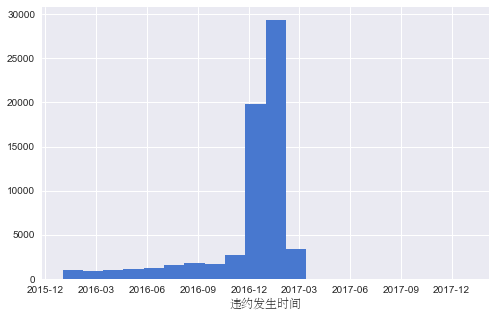

In [9]:
#绘图设置
sns.set(style='darkgrid', palette='muted', color_codes=True)
sns.set_context(rc={'figure.figsize': (8, 5) } )
zhfont1 = mpl.font_manager.FontProperties(fname='C:\Windows\Fonts\STSONG.TTF')

#违约时间
CC1["default_date"].hist(bins=20)
plt.xlabel(u'违约发生时间',fontproperties=zhfont1)
plt.show()
#plt.savefig('default_date.jpg')

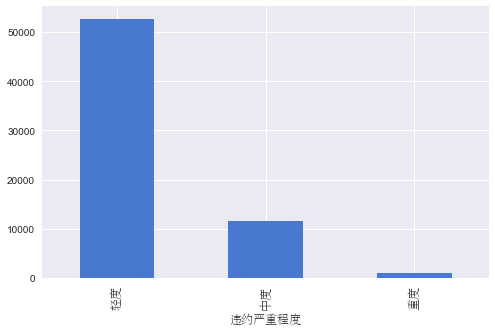

In [10]:
#严重程度
CC1["default_extent"].value_counts().plot("bar")
plt.xticks((0,1,2),(u"轻度",u"中度",u"重度") ,fontproperties=zhfont1)
plt.xlabel(u'违约严重程度',fontproperties=zhfont1)
plt.show()
#plt.savefig('default_extent.jpg')

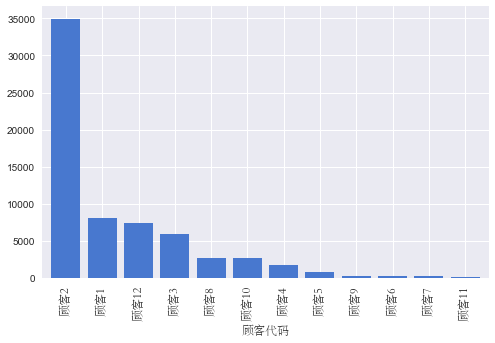

In [11]:
#顾客类别
CC1["category"].value_counts().plot("bar",width=0.8)
plt.xticks(range(0,12,1),CC1["category"].value_counts().index,fontproperties=zhfont1)
plt.xlabel(u'顾客代码',fontproperties=zhfont1)
plt.show()
#plt.savefig('category.jpg')

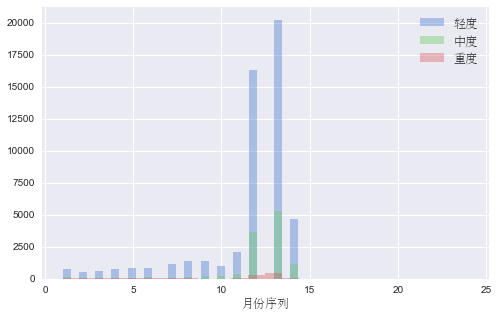

In [12]:
#时间与违约程度
ax1=sns.distplot(CC1["months_seq"][CC1["default_extent"]==u"轻度"],label = u"轻度",kde=False)
ax2=sns.distplot(CC1["months_seq"][CC1["default_extent"]==u"中度"],label = u"中度",kde=False)
ax3=sns.distplot(CC1["months_seq"][CC1["default_extent"]==u"重度"],label = u"重度",kde=False)
plt.legend(prop=zhfont1)
plt.xlabel(u'月份序列',fontproperties=zhfont1)
plt.show()
#plt.savefig('default_date_extent.jpg')

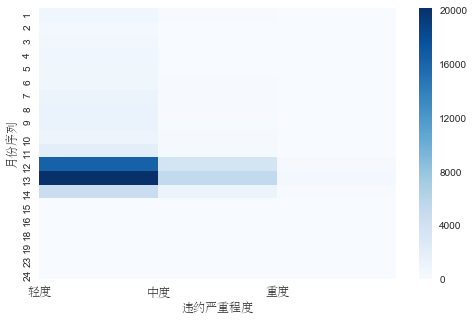

In [15]:
pc = pd.crosstab(CC1.months_seq,CC1.default_extent2)
sns.heatmap(pc,cmap='Blues')
plt.xticks((0,1,2),(u"轻度",u"中度",u"重度") ,fontproperties=zhfont1)
plt.ylabel(u'月份序列',fontproperties=zhfont1)
plt.xlabel(u'违约严重程度',fontproperties=zhfont1)
plt.show()
#plt.savefig('default_date_extent2.jpg')

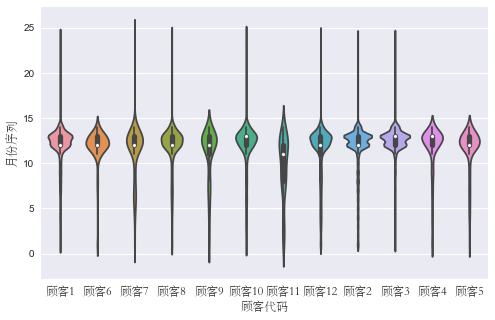

In [16]:
#顾客类别与违约时间
sns.violinplot(x="category", y="months_seq", data=CC1, scale="area")
plt.xticks(range(12),(u'顾客1', u'顾客6', u'顾客7', u'顾客8', u'顾客9', u'顾客10', u'顾客11', u'顾客12',
       u'顾客2', u'顾客3', u'顾客4', u'顾客5'),fontproperties=zhfont1)
plt.xlabel(u'顾客代码',fontproperties=zhfont1)
plt.ylabel(u'月份序列',fontproperties=zhfont1)
plt.show()
#plt.savefig('category_months_seq.jpg')

#sns.boxplot(x="category", y="months_seq",  data=CC1)

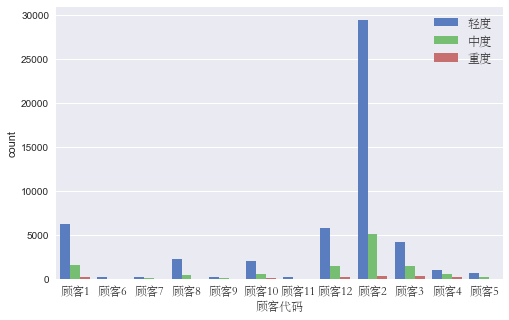

In [17]:
#顾客类别与违约程度（如果能画堆积柱状图就好了）
sns.countplot(x = "category", hue = "default_extent", data = CC1)
plt.xticks(range(12),(u'顾客1', u'顾客6', u'顾客7', u'顾客8', u'顾客9', u'顾客10', u'顾客11', u'顾客12',
       u'顾客2', u'顾客3', u'顾客4', u'顾客5'),fontproperties=zhfont1)
plt.xlabel(u'顾客代码',fontproperties=zhfont1)
plt.legend(prop=zhfont1)
plt.show()
#plt.savefig('category_default_extent.jpg')

In [18]:
#分顾客类别查看
group1 = CC1.groupby("category")
group1['months_seq',"default_extent2"].agg(["min",'mean',"max","var","count"])  

months_seq                                  default_extent2  \
                min       mean max        var  count             min   
category                                                               
顾客1               1  11.648394  24   6.611783   8063             1.0   
顾客10              1  11.590892  24   7.942884   2657             1.0   
顾客11              1   9.720000  14  12.051859    200             1.0   
顾客12              1  11.252577  24   8.910284   7372             1.0   
顾客2               1  11.569955  24   7.641955  34894             1.0   
顾客3               1  12.185272  24   4.223954   5975             1.0   
顾客4               1  11.502535  14   8.441792   1775             1.0   
顾客5               1  11.551564  14   6.479647    863             1.0   
顾客6               1  11.932584  14   3.461603    267             1.0   
顾客7               1  11.341880  24   8.183045    234             1.0   
顾客8               1  11.630117  24   6.633155   2736             1.0   
顾客9               1  11.015060  14   9.543579    332             1.0   

                                          
              mean  max       var  count  
category                                  
顾客1       1.241969  3.0  0.226857   8063  
顾客10      1.248024  3.0  0.218205   2657  
顾客11      1.075000  3.0  0.099874    200  
顾客12      1.247423  3.0  0.235341   7372  
顾客2       1.162406  3.0  0.151739  34894  
顾客3       1.338912  3.0  0.311132   5975  
顾客4       1.505915  3.0  0.423725   1775  
顾客5       1.207416  3.0  0.166905    863  
顾客6       1.078652  3.0  0.080257    267  
顾客7       1.188034  3.0  0.161916    234  
顾客8       1.182749  3.0  0.161838   2736  
顾客9       1.271084  3.0  0.234448    332

In [20]:
#查看不同程度的违约人数
pd.pivot_table(CC1, index='category', columns='default_extent2',
               values = ["months_seq"],aggfunc=len,margins=True)
pd.pivot_table(CC1, index='category', columns='default_extent2',
               values = ["months_seq"],aggfunc=len,
                        margins=False).apply(lambda r: r/r.sum(), axis=1)

months_seq                    
default_extent2        1.0       2.0       3.0
category                                      
顾客1               0.779735  0.198561  0.021704
顾客10              0.767783  0.216409  0.015807
顾客11              0.940000  0.045000  0.015000
顾客12              0.777130  0.198318  0.024552
顾客2               0.845446  0.146701  0.007852
顾客3               0.704603  0.251883  0.043515
顾客4               0.580845  0.332394  0.086761
顾客5               0.793743  0.205098  0.001159
顾客6               0.925094  0.071161  0.003745
顾客7               0.816239  0.179487  0.004274
顾客8               0.823465  0.170322  0.006213
顾客9               0.746988  0.234940  0.018072

In [21]:
#查看用户违约时间分布
CC1["months_seq"].value_counts(sort = False)
pd.pivot_table(CC1, index='category', columns='months_seq',
               values = ["default_extent2"],aggfunc=len,margins=True)
pd.pivot_table(CC1, index='category', columns='months_seq',
               values = ["default_extent2"],aggfunc=len,margins=False).apply(lambda r: r/r.sum(), axis=1) 

default_extent2                                                    \
months_seq              1         2         3         4         5         6    
category                                                                       
顾客1               0.009426  0.008186  0.009054  0.014139  0.012030  0.012774   
顾客10              0.010538  0.009409  0.015807  0.015807  0.015055  0.022205   
顾客11              0.035000  0.025000  0.050000  0.005000  0.020000  0.005000   
顾客12              0.015057  0.008410  0.017092  0.021839  0.021297  0.020212   
顾客2               0.014874  0.010288  0.011635  0.013727  0.013641  0.014272   
顾客3               0.006360  0.004686  0.005690  0.005356  0.008368  0.008033   
顾客4               0.021408  0.007324  0.012958  0.015211  0.014085  0.015211   
顾客5               0.008111  0.005794  0.006952  0.016222  0.018540  0.019699   
顾客6               0.014981       NaN       NaN       NaN  0.003745  0.003745   
顾客7               0.008547  0.004274  0.004274  0.017094  0.021368  0.047009   
顾客8               0.011330  0.006213  0.008406  0.009137  0.014985  0.020102   
顾客9               0.018072  0.009036  0.018072  0.012048  0.027108  0.027108   

                                                                        \
months_seq        7         8         9         10        11        12   
category                                                                 
顾客1         0.021084  0.023937  0.027781  0.025549  0.041672  0.315763   
顾客10        0.016560  0.022958  0.020700  0.019571  0.054196  0.258562   
顾客11        0.070000  0.090000  0.115000  0.045000  0.125000  0.185000   
顾客12        0.023603  0.032556  0.032013  0.023196  0.041644  0.286896   
顾客2         0.019402  0.025878  0.024675  0.018742  0.033244  0.312890   
顾客3         0.009205  0.007029  0.015397  0.012887  0.033305  0.324351   
顾客4         0.020282  0.019155  0.038873  0.023099  0.040000  0.244507   
顾客5         0.023175  0.018540  0.024334  0.018540  0.056779  0.373117   
顾客6         0.011236  0.014981  0.011236  0.007491  0.123596  0.430712   
顾客7         0.042735  0.017094  0.029915  0.021368  0.021368  0.358974   
顾客8         0.024854  0.020468  0.020102  0.017544  0.059576  0.331140   
顾客9         0.045181  0.045181  0.027108  0.015060  0.057229  0.283133   

                                                                        \
months_seq        13        14        15        16        18        19   
category                                                                 
顾客1         0.394394  0.083716  0.000124       NaN       NaN       NaN   
顾客10        0.407226  0.109898  0.000753       NaN       NaN       NaN   
顾客11        0.175000  0.055000       NaN       NaN       NaN       NaN   
顾客12        0.381579  0.074335       NaN       NaN       NaN       NaN   
顾客2         0.396888  0.089672  0.000057  0.000029       NaN  0.000029   
顾客3         0.438828  0.120000  0.000167       NaN  0.000167       NaN   
顾客4         0.435493  0.092394       NaN       NaN       NaN       NaN   
顾客5         0.324450  0.085747       NaN       NaN       NaN       NaN   
顾客6         0.322097  0.056180       NaN       NaN       NaN       NaN   
顾客7         0.333333  0.068376       NaN       NaN       NaN       NaN   
顾客8         0.365132  0.090278       NaN       NaN  0.000365       NaN   
顾客9         0.340361  0.075301       NaN       NaN       NaN       NaN   

                                
months_seq        23        24  
category                        
顾客1              NaN  0.000372  
顾客10             NaN  0.000753  
顾客11             NaN       NaN  
顾客12             NaN  0.000271  
顾客2         0.000029  0.000029  
顾客3              NaN  0.000167  
顾客4              NaN       NaN  
顾客5              NaN       NaN  
顾客6              NaN       NaN  
顾客7              NaN  0.004274  
顾客8              NaN  0.000365  
顾客9              NaN       NaN

In [22]:
#交叉表
pd.crosstab(CC1.months_seq,CC1.default_extent2).apply(lambda r: r/r.sum(), axis=1) 
pd.crosstab(CC1.months_seq,CC1.default_extent2,normalize = "index") #行占比

default_extent2,1.0,2.0,3.0
months_seq,,,
1,0.840830,0.115340,0.043829
2,0.881849,0.075342,0.042808
3,0.846667,0.098667,0.054667
4,0.871539,0.080842,0.047619
5,0.872964,0.082519,0.044517
6,0.850716,0.108384,0.040900
7,0.906687,0.071540,0.021773
8,0.882724,0.097730,0.019546
9,0.850755,0.138369,0.010876


### 设计评价方法

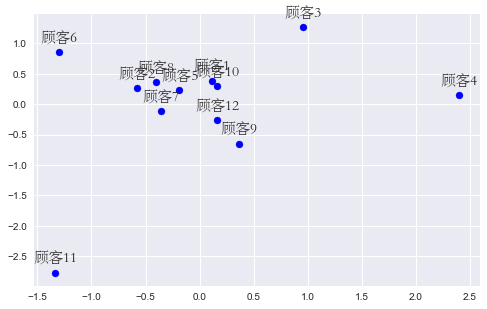

category
顾客4     1.274441
顾客3     1.109359
顾客1     0.249987
顾客10    0.229176
顾客5     0.021025
顾客8    -0.021598
顾客12   -0.050241
顾客9    -0.142042
顾客2    -0.158976
顾客6    -0.225216
顾客7    -0.234529
顾客11   -2.051386
Name: mean, dtype: float64

In [23]:
category = "category"
eva1 = "default_extent2"
eva2 = "months_seq"
data = CC1

#综合方法1：主观赋权法
group1 = CC1.groupby("category")
group1['months_seq',"default_extent2"].agg(['mean',"var","count"])  


def evaluation1(category,eva1,eva2,data,alpha):
    mean = data.groupby(category)[eva1,eva2].agg(["mean"]) 
    mean_norm = (mean-mean.mean())/mean.std() #归一化
    plt.scatter(mean_norm[eva1],mean_norm[eva2],c="blue")
    for j in range(12):
        plt.text(mean_norm[eva1].ix[j],mean_norm[eva2].ix[j]+0.1,mean_norm.index[j],
                 ha='center', va= 'bottom',fontsize=15,fontproperties=zhfont1)
    plt.show()
    res = mean_norm[eva1]*alpha+mean_norm[eva2]*(1-alpha)
    res_sort = res["mean"].copy().sort_values(ascending=False)
    return res_sort

evaluation1("category","default_extent2", "months_seq",CC1,0.5)

In [24]:
#综合评价方法3：Topsis
def evaluation3(category,eva1,eva2,data):
    mean = data.groupby(category)[eva1,eva2].agg(["mean"]) 
    mean_norm = (mean-mean.mean())/mean.std() #归一化
    sq_minus = (mean_norm - mean_norm.max())**2
    sq_plus = (mean_norm - mean_norm.min())**2
    D_minus = np.sqrt(sq_minus[eva1]+sq_minus[eva2])
    D_plus = np.sqrt(sq_plus[eva1]+sq_plus[eva2])
    D = D_minus/(D_minus+D_plus)
    res_sort = D["mean"].copy().sort_values(ascending=True)
    return res_sort
evaluation3("category","default_extent2", "months_seq",CC1)

category
顾客4     0.190782
顾客3     0.237867
顾客1     0.413787
顾客10    0.416919
顾客5     0.464794
顾客8     0.474403
顾客12    0.481478
顾客2     0.501772
顾客9     0.507079
顾客6     0.507162
顾客7     0.521344
顾客11    1.000000
Name: mean, dtype: float64

In [25]:
#综合评价方法4：Topsis改进版
def evaluation4(category,eva1,eva2,data):
    mean = data.groupby(category)[eva1,eva2].agg(["mean"]) 
    mean_norm = (mean-mean.mean())/mean.std() #归一化
    sq_plus = (mean_norm - mean_norm.min())**2
    D_plus = np.sqrt(sq_plus[eva1]+sq_plus[eva2])   
    sq_minus2 =(mean_norm -(2*mean_norm.max()- mean_norm.min()))**2    
    D_minus2 = np.sqrt(sq_minus2[eva1]+sq_minus2[eva2])
    D2 = D_minus2/(D_minus2+D_plus)
    res_sort2 = D2["mean"].copy().sort_values(ascending=True)
    return res_sort2
evaluation4("category","default_extent2", "months_seq",CC1)

category
顾客4     0.573140
顾客3     0.586113
顾客1     0.691234
顾客10    0.695633
顾客6     0.705311
顾客8     0.715245
顾客5     0.716330
顾客2     0.728989
顾客12    0.736553
顾客7     0.749212
顾客9     0.753139
顾客11    1.000000
Name: mean, dtype: float64